# ミラー毎の複数楕円を回転させます！

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ellipse_formula = lambda a, elip_len: a**2 / elip_len**2

In [3]:
def make_elip_spot_mirror(elip_len_x_list, elip_len_y_list, coor_x_list, coor_y_list, theta_list, axis_x, axis_y, ellipse_num):
    
    elip_spot_mirror = np.zeros([axis_x, axis_y])
    
    for k in range(ellipse_num):
        rotate = np.array([[np.cos(theta_list[k]),np.sin(theta_list[k])],[-np.sin(theta_list[k]), np.cos(theta_list[k])]])
        
        for j in range(axis_y):
            for i in range(axis_x):
                y = j + 1
                x = i + 1
                
                [X, Y] = np.dot([x - coor_x_list[k], y - coor_y_list[k]], rotate)

                x_formula = ellipse_formula(X, elip_len_x_list[k])
                y_formula = ellipse_formula(Y, elip_len_y_list[k])

                if x_formula + y_formula <= 1:
                    elip_spot_mirror[j,i] += 1
    
    return elip_spot_mirror

In [4]:
def make_param_list(dat_n):

    ellipse_nums = []
    param_list = []

    for dat_i in range(dat_n):

        ellipse_nums.append(np.random.randint(1, 10))

        init_elip_len_x_list = np.random.randint(1, 100, size=ellipse_nums[dat_i])
        init_elip_len_y_list = np.random.randint(1, 100, size=ellipse_nums[dat_i])
        init_coor_x_list = np.random.randint(1, 100, size=ellipse_nums[dat_i])
        init_coor_y_list = np.random.randint(1, 100, size=ellipse_nums[dat_i])
        init_theta_list = np.pi*np.random.rand(ellipse_nums[dat_i])*2

        param_list.append(np.array([init_elip_len_x_list, init_elip_len_y_list, init_coor_x_list, init_coor_y_list, init_theta_list]))
        
    return param_list, ellipse_nums

In [5]:
axis_x = 100
axis_y = 100
dat = []
dat_num = 16

param_list, ellipse_nums = make_param_list(dat_num)
for [elip_len_x_list, elip_len_y_list, coor_x_list, coor_y_list, theta_list], ellipse_num in tqdm(zip(param_list, ellipse_nums), total=dat_num):
    dat.append(make_elip_spot_mirror(elip_len_x_list, elip_len_y_list, coor_x_list, coor_y_list, theta_list, axis_x, axis_y, ellipse_num))

100%|██████████| 16/16 [00:13<00:00,  1.17it/s]


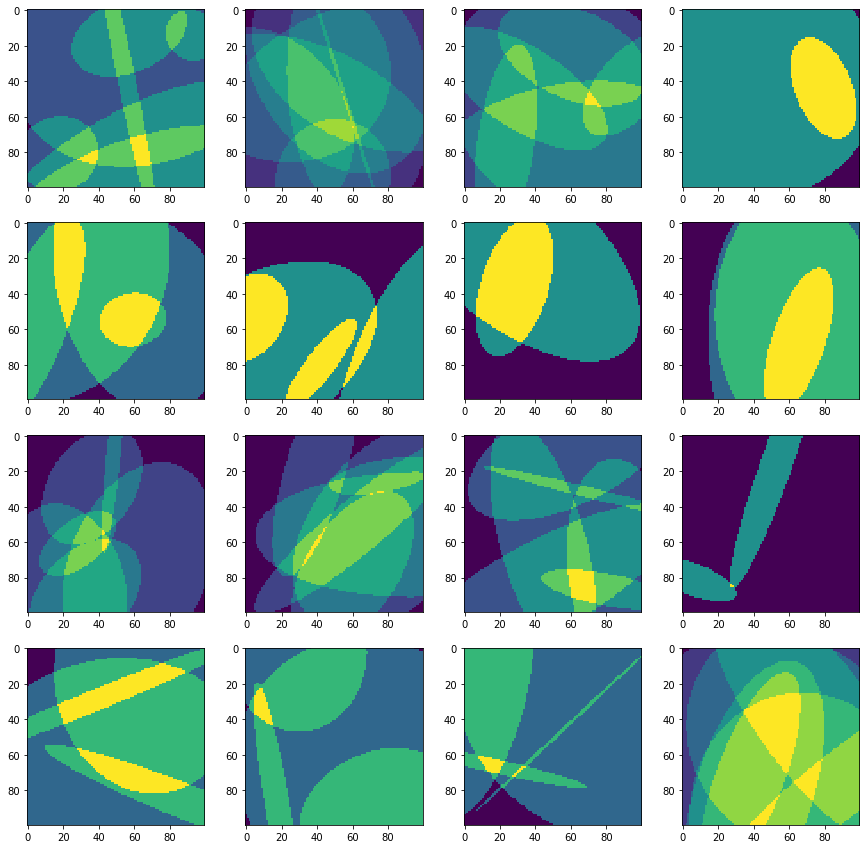

In [6]:
fig = plt.figure(figsize=(15,15))

for i in range(len(dat)):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(dat[i])